# 1-Database loading step

In [1]:
import pandas as pd

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


# 2-Data discovery
**Through it, we learn about the data we have, such as what columns it contains and whether it contains empty values ​​or not.**

In [2]:
print(df.head())     # أول 5 صفوف
print(df.tail())     # آخر 5 صفوف

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
         id  gender   age  hypertension  heart_disease e

In [3]:
df.info()  # أنواع الأعمدة وعدد القيم غير الفارغة

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# حجم البيانات
print("Shape:", df.shape)


Shape: (5110, 12)


In [5]:
#الدالة df.describe() تُستخدم لعرض ملخص إحصائي سريع للبيانات مثل المتوسط، الانحراف المعياري، القيم الصغرى والكبرى، والوسيط للأعمدة الرقمية في DataFrame.
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# اسماء الاعمده المتوفره لدينا
print(df.columns)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [7]:
#الدالة df.nunique() تُستخدم لحساب عدد القيم الفريدة (المميزة) في كل عمود داخل DataFrame.
df.nunique()


,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


**Through this function, we learned that we have object-type values that need to be converted to numerical types**

In [8]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


****Through this function, we learned that there are null values that need to be handled.****

In [9]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


# 3-Data Processing:
Data processing is the process of collecting, cleaning, transforming, and organizing raw data into a meaningful format that can be analyzed and used for decision-making. It involves several key steps, including:

1-Handling missing (null) values

2-Converting object-type data to numerical format

3-Normalizing and scaling values

4-Ensuring data consistency and correctness

5-handling imbalance data

In [10]:
# 1. تنظيف البيانات
# التعامل مع القيم الناقصة: تعويض قيمة BMI بـ المتوسط
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [11]:

# التعامل مع القيم الناقصة في smoking_status: تعويضها بأكثر حالة تكرارًا
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

In [12]:
from sklearn.preprocessing import LabelEncoder
# 2. تحويل الأعمدة من النوع Object إلى أرقام باستخدام LabelEncoder
# الأعمدة النصية اللي نحتاج نعمل لها ترميز
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# إنشاء نسخة من LabelEncoder
label_encoder = LabelEncoder()

# عمل ترميز لكل عمود نصي باستخدام لوب
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


**In this step, we split the data into two parts:**

X: Contains the **features** we'll use to predict outcomes. This is done by deleting the 'stroke' column because it's the target column.

Y: Contains the **target**, which is the value we're trying to predict or classify, in this case 'stroke'.

In [13]:
# 3. تقسيم البيانات إلى X (المميزات) و y (الهدف)
X = df.drop('stroke', axis=1)  # حذف عمود 'stroke' لأننا نستخدمه كهدف
y = df['stroke']  # الهدف

# **4-Imbalance data**

In [14]:
#Check Class Imbalance
print(df['stroke'].value_counts())


stroke
0    4861
1     249
Name: count, dtype: int64


In [15]:
!pip install imbalanced-learn  # فقط إذا لم تكن مثبتة

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(y_resampled.value_counts())  # تأكد إن البيانات توازنت


stroke
1    4861
0    4861
Name: count, dtype: int64


In [16]:
# أولاً: تحويل X_resampled و y_resampled إلى DataFrame واحد
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['stroke'] = y_resampled

#4-Descriptive Statistics:

In [53]:
# Descriptive Statistics
print("Descriptive Statistics:\n")
print(df.describe())
print( "Target conut:\n")
print(resampled_df['stroke'].value_counts())
print(resampled_df['stroke'].value_counts().rename(index={0: 'No Stroke', 1: 'Stroke'}))


Descriptive Statistics:

                 id       gender          age  hypertension  heart_disease  \
count   5110.000000  5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.414286    43.226614      0.097456       0.054012   
std    21161.721625     0.493044    22.612647      0.296607       0.226063   
min       67.000000     0.000000     0.080000      0.000000       0.000000   
25%    17741.250000     0.000000    25.000000      0.000000       0.000000   
50%    36932.000000     0.000000    45.000000      0.000000       0.000000   
75%    54682.000000     1.000000    61.000000      0.000000       0.000000   
max    72940.000000     2.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   5110.000000  5110.000000     5110.000000        5110.000000   
mean       0.656164     2.167710        0.508023         106.147677   
std        0.475034     1.090293        0.499985          4

#5-Visualization

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**In this step, we plot the distribution of ages by stroke status:**

We use the Seaborn library to plot a histogram showing the age distribution.

The variable hue='stroke' colors the columns based on whether or not the person has had a stroke, helping us compare the distribution between the two conditions.

The kde=True option adds a probability density curve to illustrate the overall shape of the distribution.

This plot helps us understand the relationship between age and the likelihood of having a stroke.

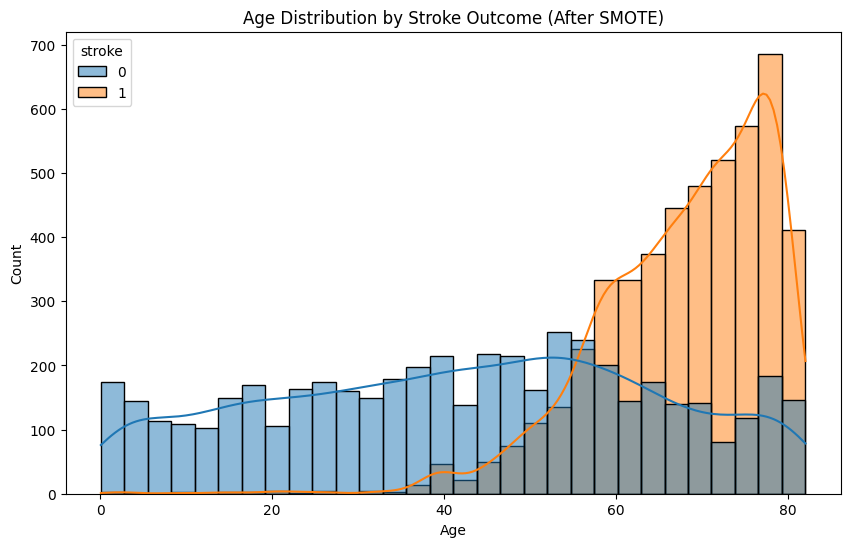

In [19]:
# 1. توزيع العمر حسب السكتة بعد التوازن
plt.figure(figsize=(10,6))
sns.histplot(data=resampled_df, x='age', hue='stroke', kde=True, bins=30)
plt.title('Age Distribution by Stroke Outcome (After SMOTE)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

 **In this step, we plot the distribution of body mass index (BMI) by stroke status:**

We use a histogram from the Seaborn library to display the distribution of BMI values.

The variable hue='stroke' distinguishes the distribution between those who had a stroke and those who did not.

The kde=True option adds a density curve to make the distribution pattern easier to understand.

This plot aims to analyze whether there is an association between BMI values ​​and the likelihood of stroke.

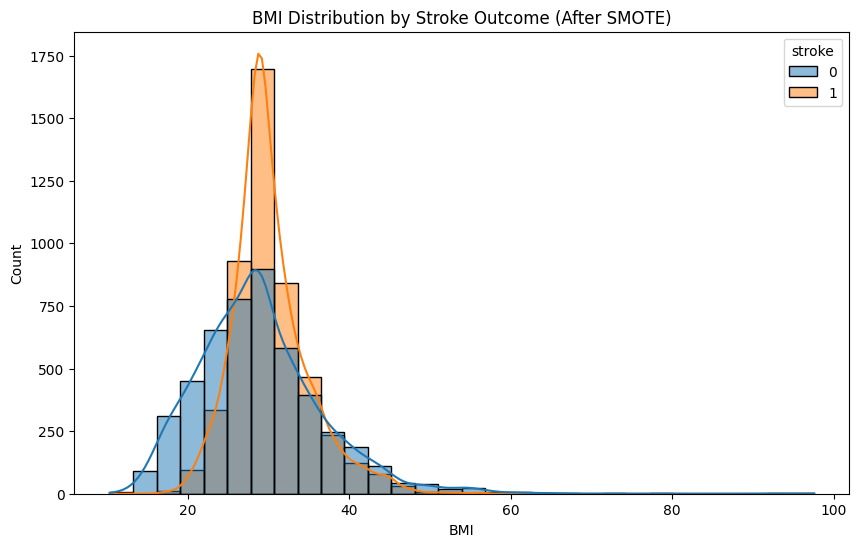

In [20]:
# 2. توزيع BMI حسب السكتة بعد التوازن
plt.figure(figsize=(10,6))
sns.histplot(data=resampled_df, x='bmi', hue='stroke', kde=True, bins=30)
plt.title('BMI Distribution by Stroke Outcome (After SMOTE)')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

**In this step, we display the distribution of glucose levels by stroke status using a boxplot, which shows the median and extreme values ​​and makes it easier to compare glucose levels between those who had a stroke and those who did not.**

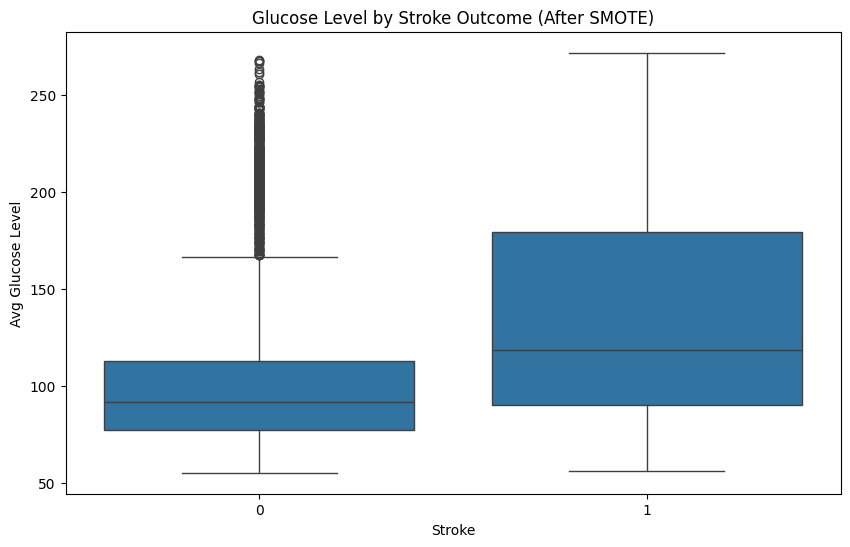

In [41]:
# 3. توزيع معدل الجلوكوز حسب السكتة (بعد SMOTE)
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=resampled_df)
plt.title('Glucose Level by Stroke Outcome (After SMOTE)')
plt.xlabel('Stroke')
plt.ylabel('Avg Glucose Level')
plt.show()

**In this step, we display the distribution of gender (male and female only) by stroke case using a countplot, which shows the number of affected and unaffected cases for each gender, which helps analyze the relationship between gender and the likelihood of stroke.**

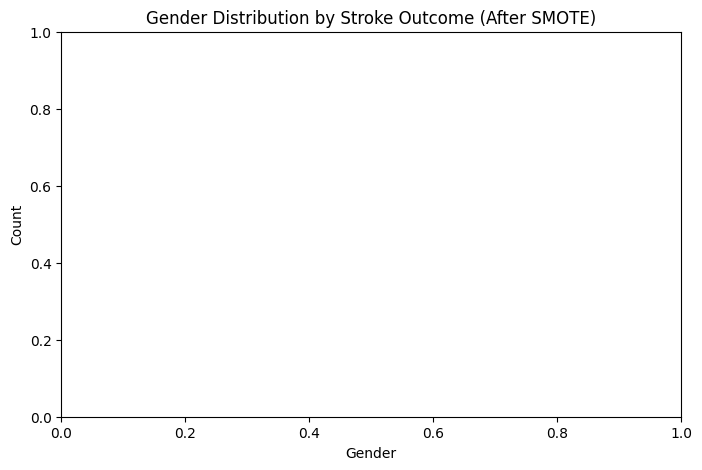

In [42]:
# 4. توزيع الجنس حسب السكتة (بعد SMOTE)
plt.figure(figsize=(8,5))
resampled_gender = resampled_df.copy()
resampled_gender['gender'] = df['gender'].iloc[:len(resampled_gender)]  # إعادة إدراج القيم الأصلية للجنس
resampled_gender = resampled_gender[resampled_gender['gender'].isin(['Male', 'Female'])]

sns.countplot(x='gender', hue='stroke', data=resampled_gender)
plt.title('Gender Distribution by Stroke Outcome (After SMOTE)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**In this step, we display an overview of the target group (stroke) using a bar chart, which shows the number of cases with and without stroke, which helps understand the distribution of the groups and the balance of the data.**

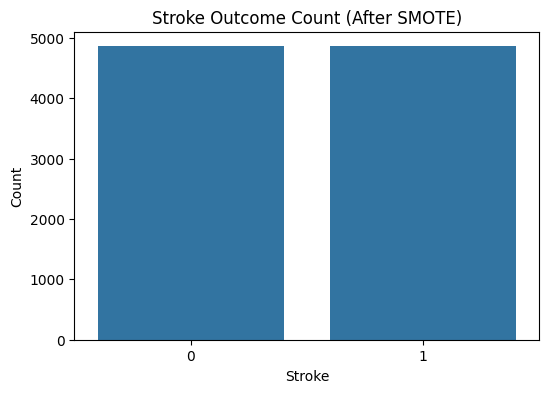

In [43]:
# 5. نظرة عامة على الفئة المستهدفة (بعد SMOTE)
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=resampled_df)
plt.title('Stroke Outcome Count (After SMOTE)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

**In this step, we plot the relationship between gender and stroke incidence using a bar chart, which shows the number of affected and unaffected cases for each gender, which helps analyze whether gender plays a role in the likelihood of stroke.**

In [44]:
# : إعادة القيم الأصلية للأعمدة الفئوية
resampled_df_viz = resampled_df.copy()
resampled_df_viz['gender'] = df['gender'].iloc[:len(resampled_df)]
resampled_df_viz['ever_married'] = df['ever_married'].iloc[:len(resampled_df)]
resampled_df_viz['work_type'] = df['work_type'].iloc[:len(resampled_df)]
resampled_df_viz['smoking_status'] = df['smoking_status'].iloc[:len(resampled_df)]


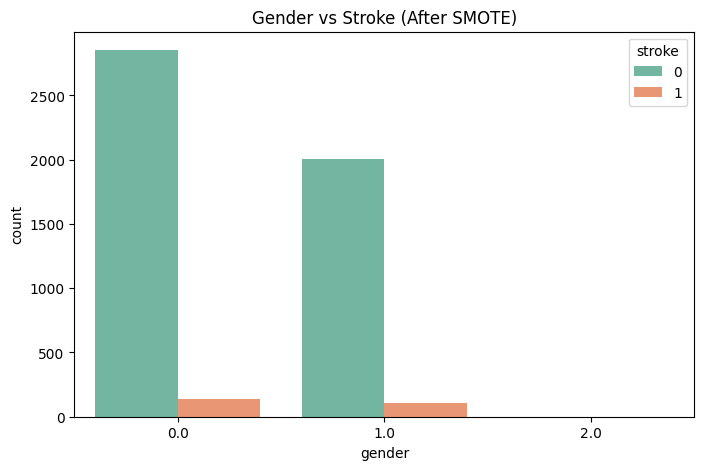

In [45]:

# علاقة الجنس والسكتة
plt.figure(figsize=(8,5))
sns.countplot(data=resampled_df_viz, x='gender', hue='stroke', palette='Set2')
plt.title('Gender vs Stroke (After SMOTE)')
plt.show()

**In this step, we display the relationship between marital status (married or single) and stroke incidence using a bar chart, to analyze whether marital status affects the likelihood of stroke.**

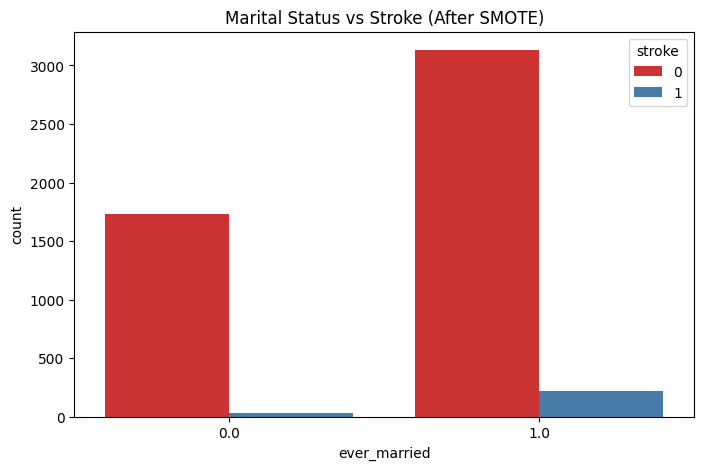

In [46]:
# علاقة الزواج والسكتة
plt.figure(figsize=(8,5))
sns.countplot(data=resampled_df_viz, x='ever_married', hue='stroke', palette='Set1')
plt.title('Marital Status vs Stroke (After SMOTE)')
plt.show()

**In this step, we plot the relationship between type of work and stroke incidence using a bar chart. This analysis helps identify job categories that may be more susceptible to stroke.**

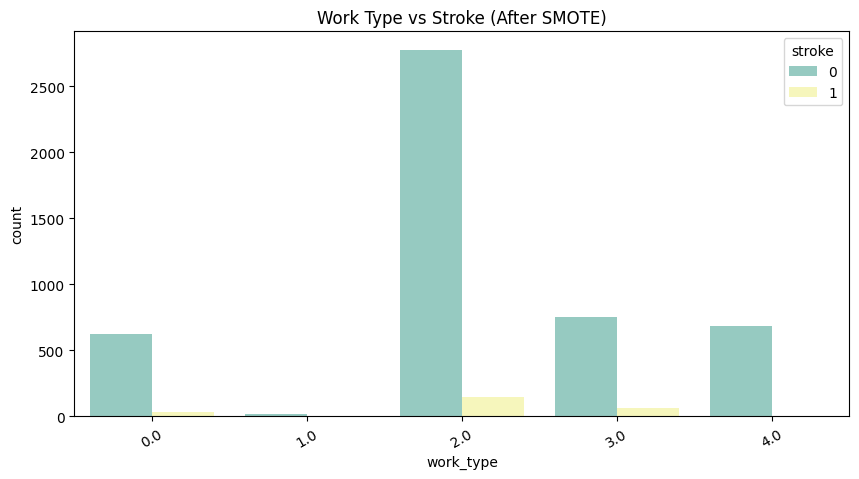

In [47]:
# علاقة الوظيفة والسكتة
plt.figure(figsize=(10,5))
sns.countplot(data=resampled_df_viz, x='work_type', hue='stroke', palette='Set3')
plt.title('Work Type vs Stroke (After SMOTE)')
plt.xticks(rotation=30)
plt.show()

**In this step, we display the relationship between smoking status and stroke risk using a bar chart, to understand the effect of smoking (current, former, never smoked) on the likelihood of stroke.**

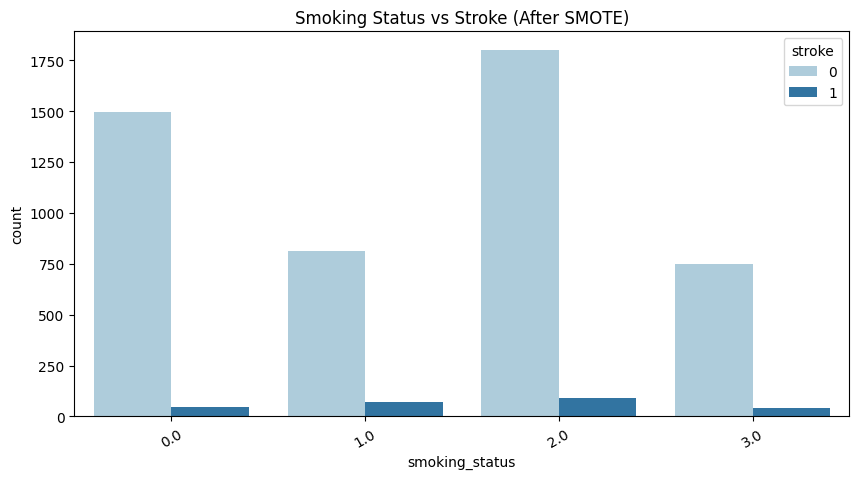

In [48]:
# التدخين والسكتة
plt.figure(figsize=(10,5))
sns.countplot(data=resampled_df_viz, x='smoking_status', hue='stroke', palette='Paired')
plt.title('Smoking Status vs Stroke (After SMOTE)')
plt.xticks(rotation=30)
plt.show()


**In this step, we use a KDE density plot to display the distribution of blood glucose levels by stroke status. This plot helps illustrate the difference in blood glucose levels between stroke and non-stroke patients.**

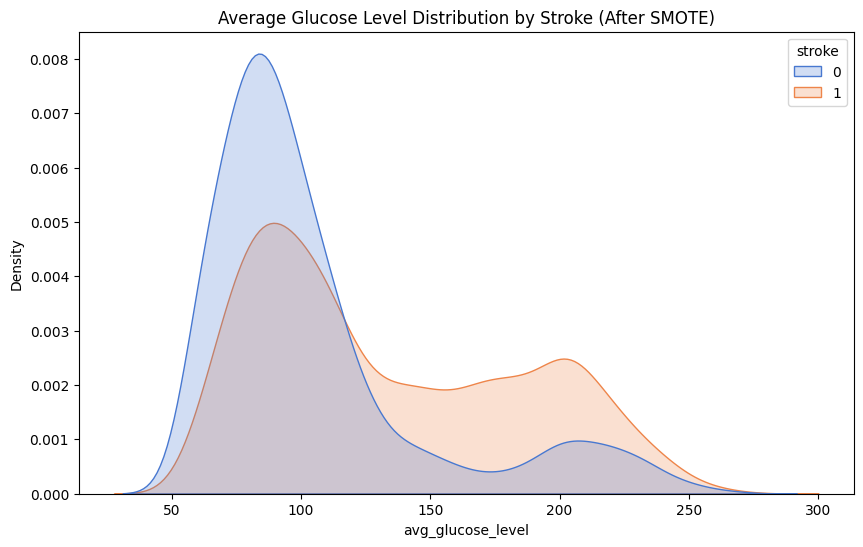

In [49]:
# مستوى السكر مقابل السكتة
plt.figure(figsize=(10,6))
sns.kdeplot(data=resampled_df, x='avg_glucose_level', hue='stroke', fill=True, palette='muted')
plt.title('Average Glucose Level Distribution by Stroke (After SMOTE)')
plt.show()

**In this step, we display the distribution of body mass index (BMI) by stroke status using a KDE density plot, which helps analyze the difference in BMI values ​​between people with and without stroke.**

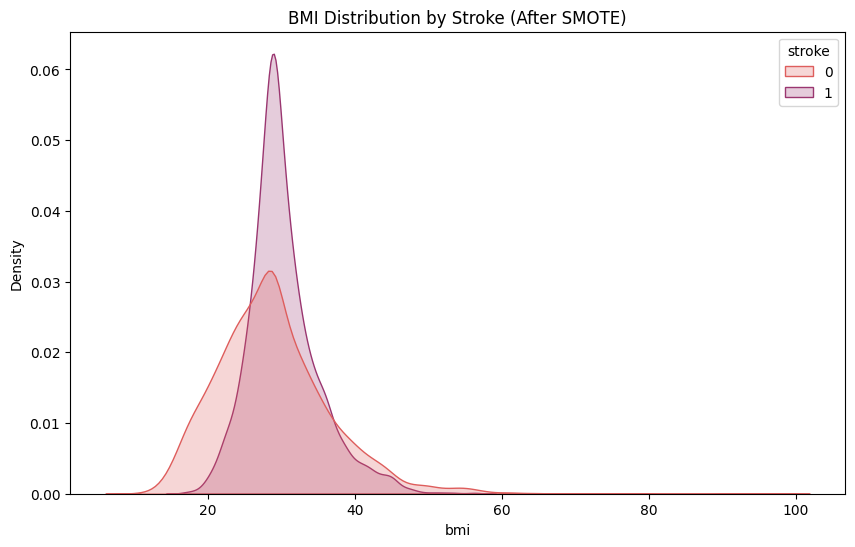

In [50]:
# مؤشر كتلة الجسم (BMI) مقابل السكتة
plt.figure(figsize=(10,6))
sns.kdeplot(data=resampled_df, x='bmi', hue='stroke', fill=True, palette='flare')
plt.title('BMI Distribution by Stroke (After SMOTE)')
plt.show()

**In this step, we display the correlation matrix using a heatmap, which shows the strength of the relationship between the numerical variables in the data, which helps identify factors that may be strongly associated with stroke incidence.**

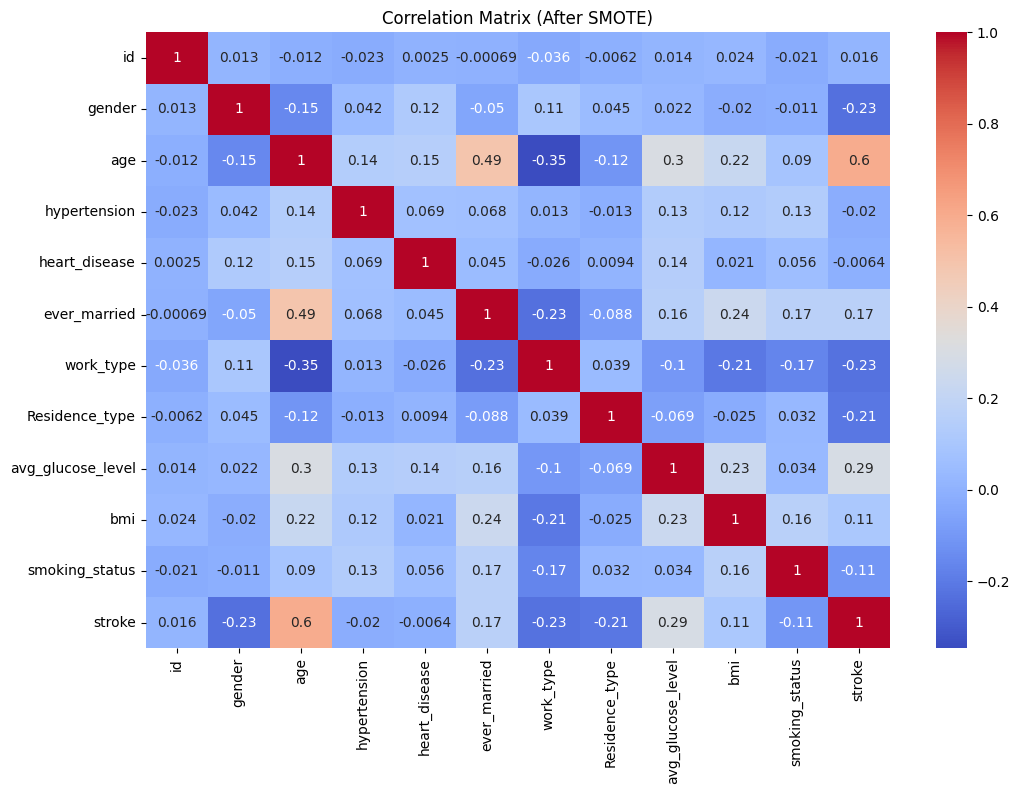

In [51]:
# مصفوفة الارتباط (Correlation Matrix)
plt.figure(figsize=(12,8))
corr = resampled_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (After SMOTE)')
plt.show()

#6-PCA
**PCA is a data dimensionality reduction technique used to reduce the number of variables while preserving as much information as possible to facilitate analysis and visualization and improve model performance.**

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. تحجيم البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. تطبيق PCA بدون تحديد n_components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. استخراج النسبة المئوية للتباين المشروح
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)



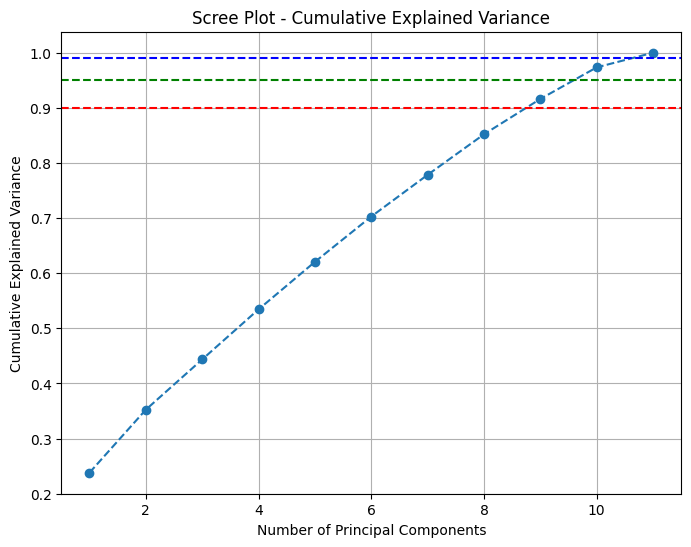

Explained variance for each component: [0.23793633 0.11435957 0.09117559 0.09085165 0.08620564 0.08223434
 0.07571715 0.07353215 0.0641442  0.05728533 0.02655806]
Total explained variance with 10 components: 1.0000


In [32]:
# 4. رسم Scree Plot (Elbow Method)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.axhline(y=0.99, color='b', linestyle='--', label='99% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 4. طباعة القيم
print(f"Explained variance for each component: {explained_variance_ratio}")
print(f"Total explained variance with 10 components: {np.sum(explained_variance_ratio):.4f}")

In [33]:
# 5. اختيار عدد المكونات حسب نسبة التباين المرغوبة (مثلاً 95%)
desired_variance = 0.95
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to reach {desired_variance*100}% variance: {n_components}")


Number of components to reach 95.0% variance: 10


In [34]:
# 6. إعادة تطبيق PCA مع العدد المثالي للمكونات
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

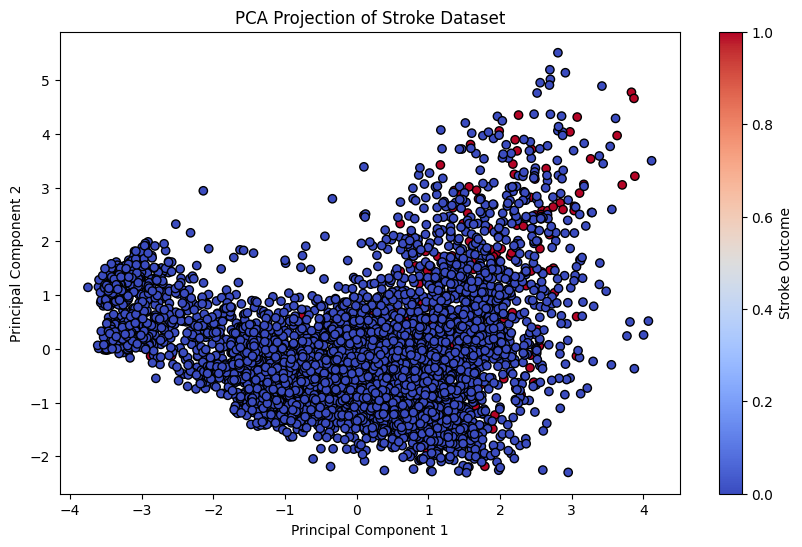

In [35]:
# عرض النتيجة بعد الـ PCA
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Stroke Dataset')
plt.colorbar(label='Stroke Outcome')
plt.show()

# 7-Model
# Model Building Steps and Decision Tree Selection:

In this project, we built a prediction model using the **Decision Tree algorithm**due to its simplicity and ease of interpretation, in addition to its ability to handle mixed data types (numerical and categorical).
We first split the data into features (X) and target (y), then applied PCA (Principal Component Analysis) to reduce dimensionality, enhance performance, and minimize noise.
After that, we trained the Decision Tree model using the training set and evaluated it using**Cross-Validation** and an independent test set.
Evaluation metrics such as Accuracy and the Confusion Matrix were used to assess the model’s performance.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [37]:
# بناء الموديل
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=5, random_state=42)

# Cross-Validation
#استخدمنا التحقق المتقاطع بخمس طيات (5-Fold Cross Validation) للحصول على تقييم أكثر دقة لأداء النموذج على بيانات التدريب.
cross_val_scores = cross_val_score(dt_model, X_pca_final, y, cv=5)  # 5-fold
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Average CV Accuracy: {np.mean(cross_val_scores) * 100:.2f}%")

Cross-Validation Scores: [0.93835616 0.92759295 0.92465753 0.93835616 0.93052838]
Average CV Accuracy: 93.19%


In [38]:
#  تدريب واختبار
#قمنا بتقسيم البيانات إلى مجموعة تدريب (80%) ومجموعة اختبار (20%) لاختبار النموذج على بيانات لم يرها من قبل.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#تدريب النموذج
dt_model.fit(X_train, y_train)
#التنبؤ على مجموعة الاختبار
y_pred = dt_model.predict(X_test)

In [52]:
#  تقييم الموديل
# We calculated the overall accuracy of the model, along with a confusion matrix and a classification report that included metrics such as recall, precision, and weighted scores. We also presented the average cross-validation accuracy.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Test Set Accuracy: 87.71%

Confusion Matrix:
[[836 139]
 [100 870]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       975
           1       0.86      0.90      0.88       970

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945



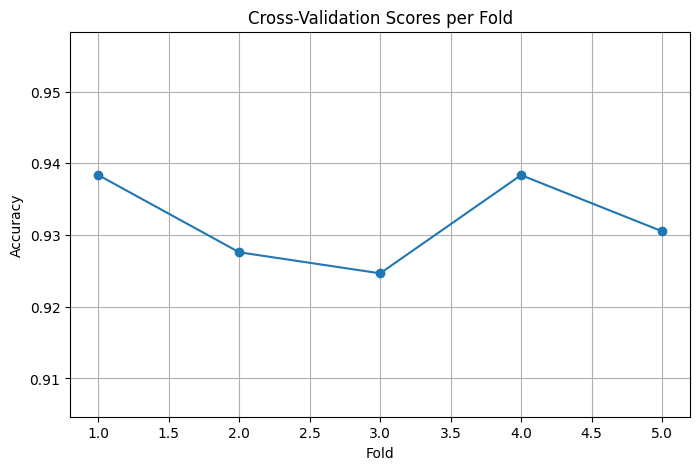

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cross_val_scores)+1), cross_val_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
# Zoom to see small differences
plt.ylim(min(cross_val_scores) - 0.02, max(cross_val_scores) + 0.02)
plt.grid(True)
plt.show()
